In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

### 1. Load your zillow dataset.

In [2]:
import wrangle

In [4]:
df = wrangle.wrangle_zillow()

In [5]:
df.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0
5,0.0,0.0,2400.0,287634.0,1943.0,3661.28,6037.0


In [8]:
df_train_and_validate, df_test = train_test_split(df, random_state=123)

In [9]:
df_train, df_validate = train_test_split(df_train_and_validate)

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.



In [17]:
df_train.calculatedfinishedsquarefeet

2232293    2281.0
9300       1560.0
194381     3324.0
2132744    3572.0
1549256    1411.0
            ...  
2847508     580.0
349158     2471.0
596060     1751.0
2907811    1875.0
693517     1784.0
Name: calculatedfinishedsquarefeet, Length: 1582625, dtype: float64

In [18]:
df_train[['calculatedfinishedsquarefeet']]

,calculatedfinishedsquarefeet
2232293,2281.0
9300,1560.0
194381,3324.0
2132744,3572.0
1549256,1411.0
...,...
2847508,580.0
349158,2471.0
596060,1751.0
2907811,1875.0


In [16]:
model = LinearRegression().fit(df_train[['calculatedfinishedsquarefeet']], df_train['taxvaluedollarcnt'])

In [19]:
predictions = model.predict(df_train[['calculatedfinishedsquarefeet']])

In [22]:
df_train['yhat'] = predictions

### 3. Plot the residuals for the linear regression model that you made.

Baseline

In [30]:
df_train['baseline'] = df_train.taxvaluedollarcnt.mean()

In [43]:
df_train['baseline_residual'] = df_train.taxvaluedollarcnt - df_train.baseline

In [31]:
df_train.baseline.head(2)

2232293    391074.23607
9300       391074.23607
Name: baseline, dtype: float64

In [23]:
df_train['residual'] = df_train['taxvaluedollarcnt'] - df_train['yhat']

Text(0.5, 1.0, 'OLS Model Residual')

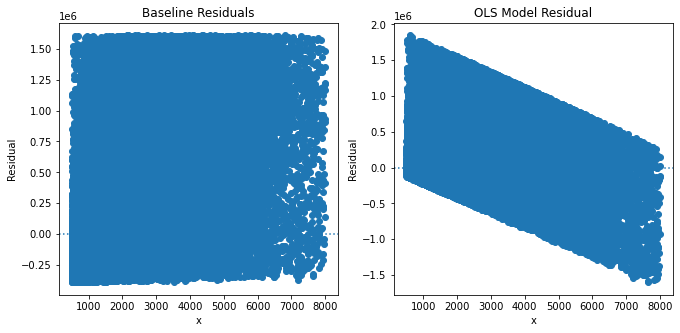

In [44]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df_train.calculatedfinishedsquarefeet, df_train.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df_train.calculatedfinishedsquarefeet, df_train.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS Model Residual')

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



SSE (sum of squared errors)

In [34]:
df_train['residual_squared'] = df_train.residual**2

In [45]:
df_train['baseline_residual_squared'] = df_train.baseline_residual**2

In [40]:
df_train.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,yhat,residual,baseline,residual_squared,baseline_residual,baseline_residual_squared
2232293,4.0,3.0,2281.0,120389.0,1976.0,1729.68,6037.0,505682.663878,-385293.663878,391074.23607,1.484512e+11,-385293.663878,1.484512e+11
9300,4.0,2.0,1560.0,81555.0,1960.0,1431.89,6037.0,351215.586143,-269660.586143,391074.23607,7.271683e+10,-269660.586143,7.271683e+10
194381,3.0,2.5,3324.0,917220.0,1990.0,10867.60,6111.0,729135.038466,188084.961534,391074.23607,3.537595e+10,188084.961534,3.537595e+10


In [46]:
SSE = df_train['residual_squared'].sum()
SSE_baseline = df_train['baseline_residual_squared'].sum()

print('SSE =', '{:.1f}'.format(SSE))
print('SSE Baseline =', '{:.1f}'.format(SSE_baseline))

SSE = 98304245548000800.0
SSE Baseline = 142408337032689680.0


MSE (mean squared error)

In [48]:
len(df_train)

1582625

In [50]:
MSE = SSE/len(df_train)
MSE_baseline = SSE_baseline/len(df_train)

print('MSE = ', '{:.1f}'.format(MSE))
print('MSE Baseline =', '{:.1f}'.format(MSE_baseline))

MSE =  62114680071.4
MSE Baseline = 89982362867.2


RMSE (root mean squared error)

In [51]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print('RMSE =', '{:.1f}'.format(RMSE))
print('RMSE Baseline =', '{:.1f}'.format(RMSE_baseline))

RMSE = 249228.2
RMSE Baseline = 299970.6


Total sum of squares / Explained sum of squares

In [52]:
# ESS = TSS - SSE

# TSS = SSE_baseline
TSS = SSE_baseline
TSS

1.4240833703268968e+17

In [54]:
ESS = TSS - SSE
ESS

4.410409148468888e+16

In [55]:
R2 = ESS/TSS
R2

0.3097016116027311